# Plotting in Pandas

A great feature of Pandas is that it is really easy to make plots and visualisation directly from the dataframes.

- [Pandas Plots](#1)
    - [<mark> Exercise: line </mark>](#line)
    - [<mark> Exercise: bar </mark>](#bar)   
- [Further Customisation](#2)
- [Advanced Pandas Plots](#3)
    - [<mark> Exercise: Growth for diet 1 </mark>](#diet1)  
    - [<mark> Assignment </mark>](#assignment)  

<a id='1' ></a>
## Pandas Plots

We use the [`.plot()`](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html) method on a DataFrame to create plot, e.g.

    *dataframe*.plot(x = ..., y =..., kind =..., ...)
    
The `.plot()` method takes several optional parameters. Most notably the *kind* parameter, which accepts eleven different string values and determines which kind of plot you’ll create:

1. "area" is for area plots.
2. "bar" is for vertical bar charts.
3. "barh" is for horizontal bar charts.
4. "box" is for box plots.
5. "hexbin" is for hexbin plots.
6. "hist" is for histograms.
7. "kde" is for kernel density estimate charts.
8. "density" is an alias for "kde".
9. "line" is for line graphs.
10. "pie" is for pie charts.
11. "scatter" is for scatter plots.

We'll demonstrate a few of these on some toy datasets.

### Scatter

In [ ]:
#Dataset tracking unemployment rate against the stock index price.

Data = {'Unemployment_Rate': [6.1,5.8,5.7,5.7,5.8,5.6,5.5,5.3,5.2,5.2],
        'Stock_Index_Price': [1500,1520,1525,1523,1515,1540,1545,1560,1555,1565]
       }
  
df = pd.DataFrame(Data,columns=['Unemployment_Rate','Stock_Index_Price'])

In [ ]:
df.plot(x = 'Stock_Index_Price', y = 'Unemployment_Rate', kind='scatter')

We can the excess output with a semi-colon. This can also be done by creating a dummy variable.

<a id='line' ></a>
### <mark> Exercise: Line </mark>

Produce a line chart for the following dataset tracking yearly unemployment rate. Customise it with a `color` argument (only need to specify the first letter of the color you want to use).

In [ ]:
Data = {'Year': [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010],
        'Unemployment_Rate': [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]
       }
df = pd.DataFrame(Data,columns=['Year','Unemployment_Rate'])

<a id='bar' ></a>
### <mark> Exercise: Bar </mark>

Make a bar chart with the data below. See if you can add a title.

In [ ]:
#Dataset for countries GDP per Capita.
Data = {'Country': ['USA','Canada','Germany','UK','France'],
        'GDP_Per_Capita': [45000,42000,52000,49000,47000]
       }
  
df = pd.DataFrame(Data,columns=['Country','GDP_Per_Capita'])
df

### Pie

In [ ]:
#Dataset tacking tasks completed
Data = {'Tasks': [300,500,700]}
df = pd.DataFrame(Data,columns=['Tasks'],index = ['Tasks Pending','Tasks Ongoing','Tasks Completed'])
df

In [ ]:
df.plot(y='Tasks',kind='pie',figsize=(5, 5), startangle=90);

<a id='3' ></a>
## Advanced Pandas Plots

Often our dataset needs some processing before we make our visulisations.

To demonstrate this, let's bring our chickweight dataset.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
chickweight = (
    pd.read_csv('data/chickweight.csv') 
      .rename(str.lower, axis='columns')
)
chickweight.head()

In [ ]:
chickweight.plot()

Imagine we wanted to explore how weight increased over time. Simply plotting weight vs. time would not be that insightful.

In [ ]:
chickweight.plot(x='time', y='weight', kind='scatter');

It may be more interesting to plot the mean weight over time.

In [ ]:
#First we'll collect this information
(
    chickweight
    .groupby('time')
    .agg(mean_weight=pd.NamedAgg(column='weight', aggfunc='mean'))
)

In [ ]:
(
    chickweight
    .groupby('time')
    .agg(mean_weight=pd.NamedAgg(column='weight', aggfunc='mean'))
).plot()

This is good but originally we wanted to investigate how the differrent diets affected the chicks.

So, let's see how the average weight at different time periods compares for the different diets. 

i.e. Let's plot four different average weight vs. time graphs, one for each diet.

In [ ]:
# First let's get the average weight at different time periods for the different diets.

mean_diet_weight_per_timestep = (
    chickweight
    .groupby(['time', 'diet'])
    .agg(mean_weight=pd.NamedAgg(column='weight', aggfunc='mean'))
    .reset_index()
)

In [ ]:
mean_diet_weight_per_timestep.head()

<a id='diet' ></a>
### <mark> Exercise: Growth for diet 1 </mark>

Select the data only for diet 1 and plot this information.

Ok, now let's see one for each diet.

To do this we could use a for loop to repeat the above, but for the different diets.

Alternatively the unstack method allows us to plot everything in one go!

In [ ]:
(
    chickweight
    .groupby(['time', 'diet'])
    .agg(mean_weight=pd.NamedAgg(column='weight', aggfunc='mean'))
    .unstack()
)

In [ ]:
(
    chickweight
    .groupby(['time', 'diet'])
    .agg(mean_weight=pd.NamedAgg(column='weight', aggfunc='mean'))
    .unstack()
).plot()

Note that the index (time) is the x-axis, and that each column gets charted.

<a id='4' ></a>
## Seaborn

Alternatively we can use the Seaborn package to do our plots.

In [ ]:
import seaborn as sns

In [ ]:
sns.lineplot(data=chickweight,x='time',y='weight');

In [ ]:
sns.lineplot(data=chickweight,\
             x='time',y='weight',\
             hue='diet');

In [ ]:
sns.lineplot(data=chickweight,\
             x='time',y='weight',\
             hue='diet', ci=None);

In [ ]:
sns.lineplot(data=mean_diet_weight_per_timestep,\
             x='time',y='mean_weight',\
             hue='diet')

In [ ]:
sns.lineplot(data=chickweight,\
             x='time',y='weight',ci=None,
            hue="diet_" + chickweight["diet"].astype(str));

<a id='assignment' ></a>
## Assignment: Rate of Growth

We have now seen how the weight of the chickens increases over time.

But at what stage do the  chickens grow the most? 

Also, does the growth per time depend on the diet? 

To answer these questions we need to invetigate the *rate* at which the chickens grow.


## Part A

To get started, we'll add a column to show weight increase for the chicks.

1) Create a column for previous weight using the `.shift()` method. 

To test whether you have done this correctly, check if the previous weight for Chick 2 at time step 0 makes sense (Hint: look back at the Creating Columns notebook).

In [4]:
# %load answers/weight-increase-1.py

,rownum,weight,time,chick,diet,previous_weight
0,1,42,0,1,1,NaN
1,2,51,2,1,1,42.0
2,3,59,4,1,1,51.0
3,4,64,6,1,1,59.0
4,5,76,8,1,1,64.0
...,...,...,...,...,...,...
573,574,175,14,50,4,155.0
574,575,205,16,50,4,175.0
575,576,234,18,50,4,205.0
576,577,264,20,50,4,234.0


2) Create a weight increase column by subtracting weight from previous weight.

You will get some `NaN` values, so consider what you will do with them.

In [6]:
# %load answers/weight-increase-2.py

,rownum,weight,time,chick,diet,weight_increase
0,1,42,0,1,1,0.0
1,2,51,2,1,1,9.0
2,3,59,4,1,1,8.0
3,4,64,6,1,1,5.0
4,5,76,8,1,1,12.0
...,...,...,...,...,...,...
573,574,175,14,50,4,20.0
574,575,205,16,50,4,30.0
575,576,234,18,50,4,29.0
576,577,264,20,50,4,30.0


## Part B

1) Now you have a weight increase column, plot the average weight increase for the chicks.

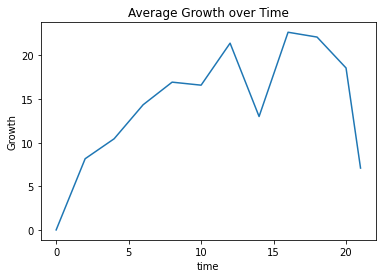

In [8]:
# %load answers/growth-rate-1.py

2) Afterwards, plot the average weight increase *per diet* for the chicks.

Use the plots to answer the assignment questions:

    "When do chickens grow the most? Does the growth per time depend on the diet?"

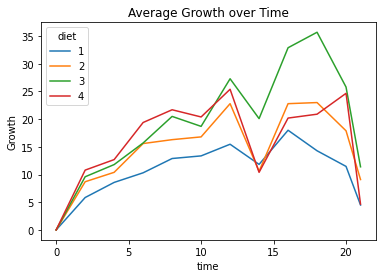

In [10]:
# %load answers/growth-rate-2.py